This CSV contains responses from the 2024 Stack Overflow Developer Survey. It includes data from ~ 65,000+ developers, capturing their demographics (age, country, education), professional background (years of coding, job role), technology usage (languages, frameworks, databases), work situation (remote, salary, company size), and views on artificial intelligence (AI tool usage and trust).
GitHub
+2
data.4tu.nl
+2

Variables are mostly categorical (with integer encoding), supplemented by numeric fields (e.g., salary, years of experience).
data.4tu.nl
+1

Each row corresponds to one respondent.

We start with uploading data:

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
schema = pd.read_csv('/content/drive/MyDrive/datasets/survey_results_schema.csv')
public = pd.read_csv('/content/drive/MyDrive/datasets/survey_results_public.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
schema.head()

,qid,qname,question,type,sub,sq_id
0,QID18,TechEndorse_1,What attracts you to a technology or causes yo...,RO,AI integration or AI Agent capabilities,1.0
1,QID18,TechEndorse_2,What attracts you to a technology or causes yo...,RO,Easy-to-use API,2.0
2,QID18,TechEndorse_3,What attracts you to a technology or causes yo...,RO,Robust and complete API,3.0
3,QID18,TechEndorse_4,What attracts you to a technology or causes yo...,RO,Customizable and manageable codebase,4.0
4,QID18,TechEndorse_5,What attracts you to a technology or causes yo...,RO,Reputation for quality,5.0


In [154]:
public.head()

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,AILearnHow,YearsCode,DevType,OrgSize,ICorPM,RemoteWork,PurchaseInfluence,TechEndorseIntro,TechEndorse_1,TechEndorse_2,TechEndorse_3,TechEndorse_4,TechEndorse_5,TechEndorse_6,TechEndorse_7,TechEndorse_8,TechEndorse_9,TechEndorse_13,TechEndorse_13_TEXT,TechOppose_1,TechOppose_2,TechOppose_3,TechOppose_5,TechOppose_7,TechOppose_9,TechOppose_11,TechOppose_13,TechOppose_16,TechOppose_15,TechOppose_15_TEXT,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSatPoints_13,JobSatPoints_14,JobSatPoints_15,JobSatPoints_16,JobSatPoints_15_TEXT,AIThreat,NewRole,ToolCountWork,ToolCountPersonal,Country,Currency,CompTotal,LanguageChoice,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,LanguagesHaveEntry,LanguagesWantEntry,DatabaseChoice,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,DatabaseHaveEntry,DatabaseWantEntry,PlatformChoice,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,PlatformHaveEntry,PlatformWantEntry,WebframeChoice,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,WebframeHaveEntry,WebframeWantEntry,DevEnvsChoice,DevEnvsHaveWorkedWith,DevEnvsWantToWorkWith,DevEnvsAdmired,DevEnvHaveEntry,DevEnvWantEntry,SOTagsHaveWorkedWith,SOTagsWantToWorkWith,SOTagsAdmired,SOTagsHaveEntry,SOTagsWant Entry,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackHaveEntry,OfficeStackWantEntry,CommPlatformHaveWorkedWith,CommPlatformWantToWorkWith,CommPlatformAdmired,CommPlatformHaveEntr,CommPlatformWantEntr,AIModelsChoice,AIModelsHaveWorkedWith,AIModelsWantToWorkWith,AIModelsAdmired,AIModelsHaveEntry,AIModelsWantEntry,SOAccount,SOVisitFreq,SODuration,SOPartFreq,SO_Dev_Content,SO_Actions_1,SO_Actions_16,SO_Actions_3,SO_Actions_4,SO_Actions_5,SO_Actions_6,SO_Actions_9,SO_Actions_7,SO_Actions_10,SO_Actions_15,SO_Actions_15_TEXT,SOComm,SOFriction,AISelect,AISent,AIAcc,AIComplex,AIToolCurrently partially AI,AIToolDon't plan to use AI for this task,AIToolPlan to partially use AI,AIToolPlan to mostly use AI,AIToolCurrently mostly AI,AIFrustration,AIExplain,AIAgents,AIAgentChange,AIAgent_Uses,AgentUsesGeneral,AIAgentImpactSomewhat agree,AIAgentImpactNeutral,AIAgentImpactSomewhat disagree,AIAgentImpactStrongly agree,AIAgentImpactStrongly disagree,AIAgentChallengesNeutral,AIAgentChallengesSomewhat disagree,AIAgentChallengesStrongly agree,AIAgentChallengesSomewhat agree,AIAgentChallengesStrongly disagree,AIAgentKnowledge,AIAgentKnowWrite,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps,14.0,"Developer, mobile",20 to 99 employees,People manager,Remote,"Yes, I influenced the purchase of a substantia...",Work,10.0,7.0,9.0,6.0,3.0,11.0,12.0,1.0,8.0,14.0,NaN,15.0,7.0,8.0,12.0,11.0,1.0,6.0,13.0,3.0,16.0,NaN,Fintech,3.0,9.0,5.0,10.0,12.0,11.0,2.0,6.0,7.0,13.0,14.0,15.0,8.0,NaN,I'm not sure,I have neither consider or transitioned into a...,7.0,3.0,Ukraine,EUR European Euro,52800.0,Yes,Bash/Shell (all shells);Dart;SQL,Dart,Dart,NaN,NaN,Yes,Cloud Firestore;PostgreSQL,NaN,NaN,NaN,NaN,Yes,Amazon Web Services (AWS);Cloudflare;Firebase;...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,Yes,Android Studio;Notepad++;Visual Studio;Visual ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Windows;MacOS;Android,Windows;MacOS;Android;iOS;iPadOS,Confluence;GitHub;GitLab;Jira;Markdown File,Markdown File,Markdown File,Na

Data preparation:


In [155]:
#AGE

import re
import numpy as np

def parse_age(age_str):
    if pd.isna(age_str):
        return np.nan
    # Extract all numbers from the string
    nums = re.findall(r'\d+', age_str)
    # Case: two numbers → take average (e.g. "25-34")
    if len(nums) == 2:
        nums = [int(n) for n in nums]
        return (nums[0] + nums[1]) / 2
    # Case: one number → return that number
    if len(nums) == 1:
        return int(nums[0])
    # Unknown format → return nan
    return np.nan

public['AgeNumeric'] = public['Age'].apply(parse_age)
public['AgeNumeric'] = public['AgeNumeric'].fillna("-1")

#EMPLOYMENT

public['Employment'] = public['Employment'].fillna("")
public['Employment'] = public['Employment'].apply(lambda x: 1 if str(x).startswith("Employed") or str(x).startswith("Independent") else 0)

#EDUCATION

def parse_education(s):
    s = str(s).lower()
    if "phd" in s or "jd" in s or "md" in s or "ed.d" in s:
        return 6
    if "master" in s:
        return 5
    if "bachelor" in s:
        return 4
    if "associate" in s:
        return 3
    if "college" in s:
        return 2
    if "secondary" in s or "high school" in s:
        return 1
    if "primary" in s or "elementary" in s:
        return 0
    return -1  # unknown

public['EdLevelNumeric'] = public['EdLevel'].apply(parse_education)

#COUNTRY   -----  ONLY FOR DECISION TREES

countries = public['Country'].astype('category')
public['CountryNumeric'] = countries.cat.codes

#YEARS OF CODING ----- ONLY FOR DECISION TREES

public['YearsCode'] = public['YearsCode'].fillna("-1")
public['YearsCode'] = public['YearsCode'].astype(int)


#LEARNCODEAI

public['LearnCodeAI'].isna().sum()
public['LearnCodeAI'] = public['LearnCodeAI'].fillna("")
public["LearnCodeAI"] = public["LearnCodeAI"].apply(lambda x: 1 if str(x).startswith("Yes") else 0)


public.head()


,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,AILearnHow,YearsCode,DevType,OrgSize,ICorPM,RemoteWork,PurchaseInfluence,TechEndorseIntro,TechEndorse_1,TechEndorse_2,TechEndorse_3,TechEndorse_4,TechEndorse_5,TechEndorse_6,TechEndorse_7,TechEndorse_8,TechEndorse_9,TechEndorse_13,TechEndorse_13_TEXT,TechOppose_1,TechOppose_2,TechOppose_3,TechOppose_5,TechOppose_7,TechOppose_9,TechOppose_11,TechOppose_13,TechOppose_16,TechOppose_15,TechOppose_15_TEXT,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSatPoints_13,JobSatPoints_14,JobSatPoints_15,JobSatPoints_16,JobSatPoints_15_TEXT,AIThreat,NewRole,ToolCountWork,ToolCountPersonal,Country,Currency,CompTotal,LanguageChoice,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,LanguagesHaveEntry,LanguagesWantEntry,DatabaseChoice,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,DatabaseHaveEntry,DatabaseWantEntry,PlatformChoice,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,PlatformHaveEntry,PlatformWantEntry,WebframeChoice,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,WebframeHaveEntry,WebframeWantEntry,DevEnvsChoice,DevEnvsHaveWorkedWith,DevEnvsWantToWorkWith,DevEnvsAdmired,DevEnvHaveEntry,DevEnvWantEntry,SOTagsHaveWorkedWith,SOTagsWantToWorkWith,SOTagsAdmired,SOTagsHaveEntry,SOTagsWant Entry,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackHaveEntry,OfficeStackWantEntry,CommPlatformHaveWorkedWith,CommPlatformWantToWorkWith,CommPlatformAdmired,CommPlatformHaveEntr,CommPlatformWantEntr,AIModelsChoice,AIModelsHaveWorkedWith,AIModelsWantToWorkWith,AIModelsAdmired,AIModelsHaveEntry,AIModelsWantEntry,SOAccount,SOVisitFreq,SODuration,SOPartFreq,SO_Dev_Content,SO_Actions_1,SO_Actions_16,SO_Actions_3,SO_Actions_4,SO_Actions_5,SO_Actions_6,SO_Actions_9,SO_Actions_7,SO_Actions_10,SO_Actions_15,SO_Actions_15_TEXT,SOComm,SOFriction,AISelect,AISent,AIAcc,AIComplex,AIToolCurrently partially AI,AIToolDon't plan to use AI for this task,AIToolPlan to partially use AI,AIToolPlan to mostly use AI,AIToolCurrently mostly AI,AIFrustration,AIExplain,AIAgents,AIAgentChange,AIAgent_Uses,AgentUsesGeneral,AIAgentImpactSomewhat agree,AIAgentImpactNeutral,AIAgentImpactSomewhat disagree,AIAgentImpactStrongly agree,AIAgentImpactStrongly disagree,AIAgentChallengesNeutral,AIAgentChallengesSomewhat disagree,AIAgentChallengesStrongly agree,AIAgentChallengesSomewhat agree,AIAgentChallengesStrongly disagree,AIAgentKnowledge,AIAgentKnowWrite,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat,AgeNumeric,EdLevelNumeric,CountryNumeric
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",1,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,1,AI CodeGen tools or AI-enabled apps,14,"Developer, mobile",20 to 99 employees,People manager,Remote,"Yes, I influenced the purchase of a substantia...",Work,10.0,7.0,9.0,6.0,3.0,11.0,12.0,1.0,8.0,14.0,NaN,15.0,7.0,8.0,12.0,11.0,1.0,6.0,13.0,3.0,16.0,NaN,Fintech,3.0,9.0,5.0,10.0,12.0,11.0,2.0,6.0,7.0,13.0,14.0,15.0,8.0,NaN,I'm not sure,I have neither consider or transitioned into a...,7.0,3.0,Ukraine,EUR European Euro,52800.0,Yes,Bash/Shell (all shells);Dart;SQL,Dart,Dart,NaN,NaN,Yes,Cloud Firestore;PostgreSQL,NaN,NaN,NaN,NaN,Yes,Amazon Web Services (AWS);Cloudflare;Firebase;...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,Yes,Android Studio;Notepad++;Visual Studio;Visual ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Windows;MacOS;Android,Windows;MacOS;Android;iOS;iPadOS,Confluence;GitHub;GitLab;Jira;Markdown File,Markdown File,Markdown File,NaN,NaN,"Stack Overf

Let's at first check the usage of AI. We'll try to predict it with the usage of different models - Logistic Regression , Support Vector Machine (SVM) and Decision Tree. For the last one we'll have more data, that can be analysed, such as countries.

In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# FEATURES
X = public[['AgeNumeric', 'Employment', 'EdLevelNumeric', 'YearsCode']]
y = public['LearnCodeAI']
# for Decision Tree
X_tree = public[['AgeNumeric', 'Employment', 'EdLevelNumeric', 'YearsCode', 'CountryNumeric']]

#TRAINTEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



#LOGISTICREGRESSION
lr_model = LogisticRegression(max_iter=1000)  # increase max_iter to ensure convergence
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))



#SVM  ---- We use kernel rbf (Radial Basis Function), it maps data to infinite dimensions; handles complex non-linear boundaries
svm_model = SVC(kernel='rbf', probability=True)  # rbf kernel
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))



#DECISION TREE
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_tree, y_train_tree)
y_pred_tree = tree_model.predict(X_test_tree)

print("Decision Tree Accuracy:", accuracy_score(y_test_tree, y_pred_tree))
print(classification_report(y_test_tree, y_pred_tree))


Logistic Regression Accuracy: 0.655470737913486
              precision    recall  f1-score   support

           0       0.60      0.23      0.33      3670
           1       0.66      0.91      0.77      6155

    accuracy                           0.66      9825
   macro avg       0.63      0.57      0.55      9825
weighted avg       0.64      0.66      0.60      9825

SVM Accuracy: 0.6812213740458015
              precision    recall  f1-score   support

           0       0.69      0.26      0.38      3670
           1       0.68      0.93      0.79      6155

    accuracy                           0.68      9825
   macro avg       0.69      0.60      0.58      9825
weighted avg       0.68      0.68      0.63      9825

Decision Tree Accuracy: 0.6162849872773537
              precision    recall  f1-score   support

           0       0.49      0.47      0.48      3670
           1       0.69      0.70      0.70      6155

    accuracy                           0.62      9825
   m

We see that SVM performs best because it can model non-linear relationships between features and AI usage, while Logistic Regression is limited by its linear assumption, leading to poor recall for non-AI users.

Speaking of Decision Tree - it predicts minority class slightly better but sacrifices overall accuracy. What's more - since we have more features it might also be an overfit.

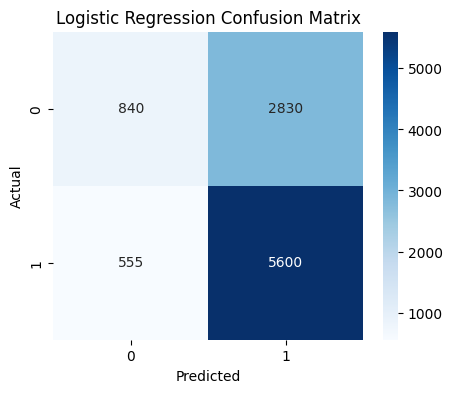

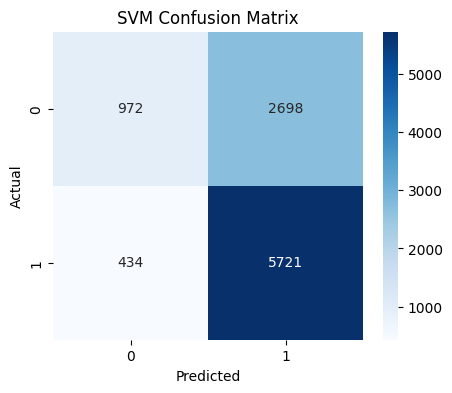

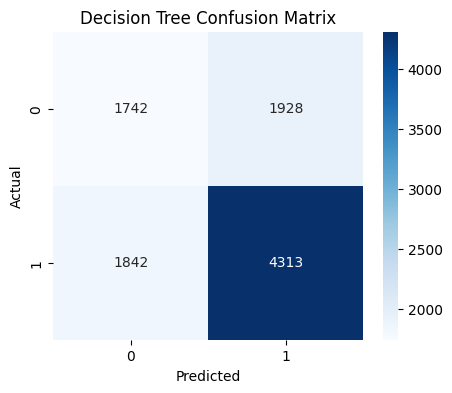

In [157]:
#CONFUSION MATRIXES
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Logistic Regression
plot_cm(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")

# SVM
plot_cm(y_test, y_pred_svm, "SVM Confusion Matrix")

# Decision Tree
plot_cm(y_test_tree, y_pred_tree, "Decision Tree Confusion Matrix")


We see, that for Logistic Regression and SVM it is hard to predict, which ones are NOT using AI, while Decision Tree predicts them better, but strugles with those, who use AI.


It's due to the fact that we have more people, who USE AI.

Now let's investigate the salary. The problem is that it is i different currencies, which there are many:

In [158]:
all_currencies=public['Currency'].unique()
print(all_currencies)

['EUR European Euro' 'UAH Ukrainian hryvnia' 'USD United States dollar'
 'INR Indian rupee' 'AUD\tAustralian dollar' 'BDT\tBangladeshi taka'
 'BRL Brazilian real' 'GBP Pound sterling' 'SEK\tSwedish krona'
 'CZK\tCzech koruna' 'PLN Polish zloty' 'HUF\tHungarian forint'
 'MYR\tMalaysian ringgit' 'CHF\tSwiss franc' 'EGP\tEgyptian pound'
 'LKR\tSri Lankan rupee' 'RUB\tRussian ruble' 'RSD\tSerbian dinar'
 'JPY\tJapanese yen' 'RON\tRomanian leu' 'CAD Canadian dollar'
 'UYU\tUruguayan peso' 'AED United Arab Emirates dirham'
 'ARS\tArgentine peso' 'NOK\tNorwegian krone' 'CRC\tCosta Rican colon'
 'PHP\tPhilippine peso' 'CNY\tChinese Yuan Renminbi'
 'ILS\tIsraeli new shekel' 'BGN\tBulgarian lev' 'MAD\tMoroccan dirham'
 'MXN\tMexican peso' 'TRY\tTurkish lira' 'BOB\tBolivian boliviano'
 'NPR\tNepalese rupee' 'ZAR\tSouth African rand' 'TND\tTunisian dinar'
 'PKR\tPakistani rupee' 'SGD\tSingapore dollar' 'PYG\tParaguayan guarani'
 'AZN\tAzerbaijan manat' 'DKK\tDanish krone' 'NGN\tNigerian naira'
 'I

We'll focus on the top 10 most popular:

In [159]:
# Count occurrences
currency_counts = public['Currency'].value_counts()

# Keep only currencies with >100 respondents
major_currencies = currency_counts.head(10).index
print(major_currencies)

# Filter dataset
salary_df = public[public['Currency'].isin(major_currencies)].copy()

Index(['EUR European Euro', 'USD United States dollar', 'INR Indian rupee',
       'GBP Pound sterling', 'CAD Canadian dollar', 'PLN Polish zloty',
       'AUD\tAustralian dollar', 'BRL Brazilian real', 'UAH Ukrainian hryvnia',
       'SEK\tSwedish krona'],
      dtype='object', name='Currency')


Now we'll be able to convert it all into USD:

In [160]:
exchange_rates = {
    'EUR European Euro': 1.10,           # 1 EUR ≈ 1.10 USD
    'USD United States dollar': 1.00,    # USD
    'INR Indian rupee': 0.012,           # 1 INR ≈ 0.012 USD
    'GBP Pound sterling': 1.25,          # 1 GBP ≈ 1.25 USD
    'CAD Canadian dollar': 0.75,         # 1 CAD ≈ 0.75 USD
    'PLN Polish zloty': 0.25,            # 1 PLN ≈ 0.25 USD
    'AUD\tAustralian dollar': 0.65,      # 1 AUD ≈ 0.65 USD
    'BRL Brazilian real': 0.20,          # 1 BRL ≈ 0.20 USD
    'UAH Ukrainian hryvnia': 0.027,      # 1 UAH ≈ 0.027 USD
    'SEK\tSwedish krona': 0.10           # 1 SEK ≈ 0.10 USD
}
salary_df['CompTotalUSD'] = salary_df.apply(lambda row: row['CompTotal'] * exchange_rates.get(row['Currency'], np.nan),axis=1)
salary_df = salary_df.dropna(subset=['CompTotalUSD'])
salary_df.head()

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,AILearnHow,YearsCode,DevType,OrgSize,ICorPM,RemoteWork,PurchaseInfluence,TechEndorseIntro,TechEndorse_1,TechEndorse_2,TechEndorse_3,TechEndorse_4,TechEndorse_5,TechEndorse_6,TechEndorse_7,TechEndorse_8,TechEndorse_9,TechEndorse_13,TechEndorse_13_TEXT,TechOppose_1,TechOppose_2,TechOppose_3,TechOppose_5,TechOppose_7,TechOppose_9,TechOppose_11,TechOppose_13,TechOppose_16,TechOppose_15,TechOppose_15_TEXT,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSatPoints_13,JobSatPoints_14,JobSatPoints_15,JobSatPoints_16,JobSatPoints_15_TEXT,AIThreat,NewRole,ToolCountWork,ToolCountPersonal,Country,Currency,CompTotal,LanguageChoice,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,LanguagesHaveEntry,LanguagesWantEntry,DatabaseChoice,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,DatabaseHaveEntry,DatabaseWantEntry,PlatformChoice,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,PlatformHaveEntry,PlatformWantEntry,WebframeChoice,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,WebframeHaveEntry,WebframeWantEntry,DevEnvsChoice,DevEnvsHaveWorkedWith,DevEnvsWantToWorkWith,DevEnvsAdmired,DevEnvHaveEntry,DevEnvWantEntry,SOTagsHaveWorkedWith,SOTagsWantToWorkWith,SOTagsAdmired,SOTagsHaveEntry,SOTagsWant Entry,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackHaveEntry,OfficeStackWantEntry,CommPlatformHaveWorkedWith,CommPlatformWantToWorkWith,CommPlatformAdmired,CommPlatformHaveEntr,CommPlatformWantEntr,AIModelsChoice,AIModelsHaveWorkedWith,AIModelsWantToWorkWith,AIModelsAdmired,AIModelsHaveEntry,AIModelsWantEntry,SOAccount,SOVisitFreq,SODuration,SOPartFreq,SO_Dev_Content,SO_Actions_1,SO_Actions_16,SO_Actions_3,SO_Actions_4,SO_Actions_5,SO_Actions_6,SO_Actions_9,SO_Actions_7,SO_Actions_10,SO_Actions_15,SO_Actions_15_TEXT,SOComm,SOFriction,AISelect,AISent,AIAcc,AIComplex,AIToolCurrently partially AI,AIToolDon't plan to use AI for this task,AIToolPlan to partially use AI,AIToolPlan to mostly use AI,AIToolCurrently mostly AI,AIFrustration,AIExplain,AIAgents,AIAgentChange,AIAgent_Uses,AgentUsesGeneral,AIAgentImpactSomewhat agree,AIAgentImpactNeutral,AIAgentImpactSomewhat disagree,AIAgentImpactStrongly agree,AIAgentImpactStrongly disagree,AIAgentChallengesNeutral,AIAgentChallengesSomewhat disagree,AIAgentChallengesStrongly agree,AIAgentChallengesSomewhat agree,AIAgentChallengesStrongly disagree,AIAgentKnowledge,AIAgentKnowWrite,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat,AgeNumeric,EdLevelNumeric,CountryNumeric,CompTotalUSD
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",1,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,1,AI CodeGen tools or AI-enabled apps,14,"Developer, mobile",20 to 99 employees,People manager,Remote,"Yes, I influenced the purchase of a substantia...",Work,10.0,7.0,9.0,6.0,3.0,11.0,12.0,1.0,8.0,14.0,NaN,15.0,7.0,8.0,12.0,11.0,1.0,6.0,13.0,3.0,16.0,NaN,Fintech,3.0,9.0,5.0,10.0,12.0,11.0,2.0,6.0,7.0,13.0,14.0,15.0,8.0,NaN,I'm not sure,I have neither consider or transitioned into a...,7.0,3.0,Ukraine,EUR European Euro,52800.0,Yes,Bash/Shell (all shells);Dart;SQL,Dart,Dart,NaN,NaN,Yes,Cloud Firestore;PostgreSQL,NaN,NaN,NaN,NaN,Yes,Amazon Web Services (AWS);Cloudflare;Firebase;...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,Yes,Android Studio;Notepad++;Visual Studio;Visual ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Windows;MacOS;Android,Windows;MacOS;Android;iOS;iPadOS,Confluence;GitHub;GitLab;Jira;Markdown File,Markdown File,Markdown File,NaN,NaN

Now let's see how it depends on features:

I choose work experience, education and country as the most important parameters.

Accuracy: 0.6817271087958325

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.70      0.69      5130
           1       0.68      0.66      0.67      4852

    accuracy                           0.68      9982
   macro avg       0.68      0.68      0.68      9982
weighted avg       0.68      0.68      0.68      9982



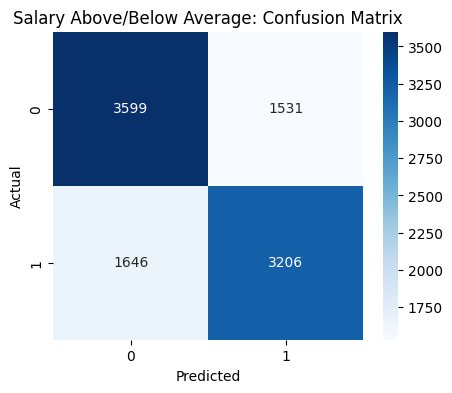

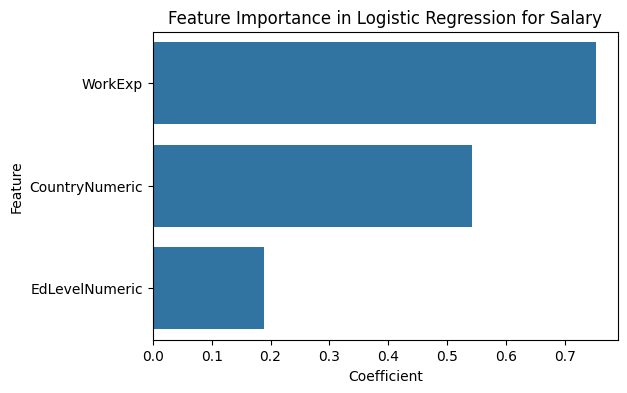

In [161]:
# DATA PREPARATION
salary_df['WorkExp'] = salary_df['WorkExp'].fillna("-1").astype(int)
salary_df['EdLevelNumeric'] = salary_df['EdLevelNumeric'].fillna(0)
salary_df['CountryNumeric'] = salary_df['CountryNumeric'].fillna(0)

# FEATURES
X = salary_df[['EdLevelNumeric', 'WorkExp', 'CountryNumeric']]
median_salary = salary_df['CompTotalUSD'].median()
salary_df['HighSalary'] = (salary_df['CompTotalUSD'] > median_salary).astype(int)
y = salary_df['HighSalary']

# TRAIN / TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

# SCALE FEATURES
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LOGISTIC REGRESSION
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# PREDICTION
y_pred = model.predict(X_test_scaled)

# METRICS
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Salary Above/Below Average: Confusion Matrix")
plt.show()

# FEATURE IMPORTANCE
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Feature Importance in Logistic Regression for Salary")
plt.show()


We see expected results - work experience is the most important.

Let's see how other types of classification behave:

Support Vector Machine
Accuracy: 0.7057703866960529
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      5130
           1       0.70      0.69      0.70      4852

    accuracy                           0.71      9982
   macro avg       0.71      0.71      0.71      9982
weighted avg       0.71      0.71      0.71      9982



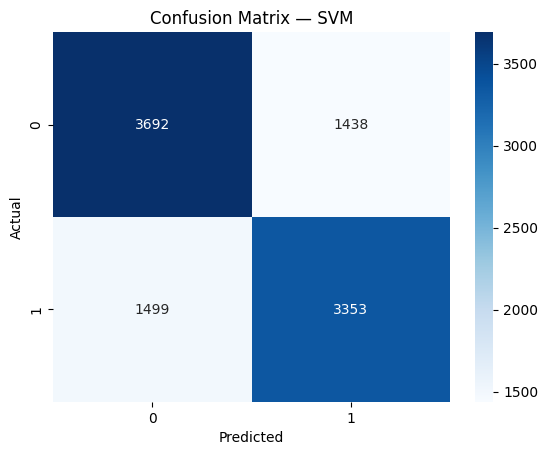

In [164]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Decision Tree
Accuracy: 0.757964335804448
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      5130
           1       0.75      0.75      0.75      4852

    accuracy                           0.76      9982
   macro avg       0.76      0.76      0.76      9982
weighted avg       0.76      0.76      0.76      9982



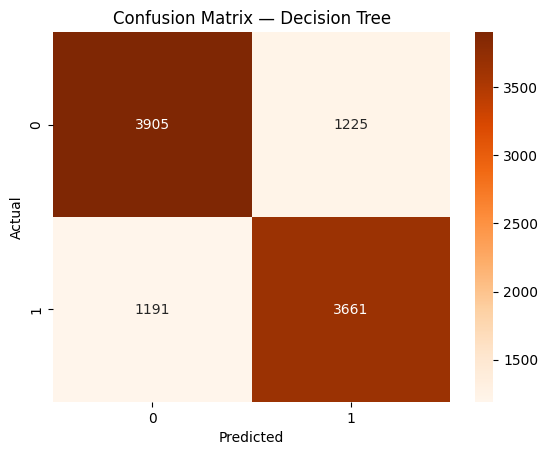

In [163]:
tree = DecisionTreeClassifier(random_state=42, max_depth=6)
tree.fit(X_train, y_train)   # DON'T SCALE TREES
y_pred_tree = tree.predict(X_test)

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix — Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

What's more - we see, that decision tree here is the most accurate type of classification.